# 1. Test of particle pusher (steps 3, 4 and 5)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import bsplines          as bsp
import Bspline           as bspline

import ECHO_pusher

In [2]:
#====================================================================================
#  calling epyccel for particle pusher
#====================================================================================
from pyccel.epyccel import epyccel
pic = epyccel(ECHO_pusher)

print('pyccelization done!')
#====================================================================================

pyccelization done!


In [14]:
Nel = [5, 6, 7]            # mesh generation on logical domain
bc  = [True, True, True]   # boundary conditions
p   = [2, 2, 3]            # splines degrees

L   = [2., 3., 1.]         # box lengthes of physical domain
Np  = int(10)              # number of particles

el_b     = [np.linspace(0., 1., Nel + 1) for Nel in Nel]                           # element boundaries
T        = [bsp.make_knots(el_b, p, bc) for el_b, p, bc in zip(el_b, p, bc)]       # knot vectors
t        = [T[1:-1] for T in T]                                                    # reduced knot vectors
Nbase0   = [Nel + p - bc*p for Nel, p, bc in zip(Nel, p, bc)]                      # number of basis functions in V0



particles       = np.empty((Np, 7), dtype=float, order='F')

particles[:, :] = np.random.rand(Np, 7)

particles[0, 0] =  0.5/L[0]
particles[0, 1] =  0.25/L[1]
particles[0, 2] =  0./L[2]
particles[0, 3] = -0.2
particles[0, 4] =  0.
particles[0, 5] =  0.

particles[1, 0] =  0.5/L[0]
particles[1, 1] =  0.25/L[1]
particles[1, 2] =  0./L[2]
particles[1, 3] = -0.1
particles[1, 4] =  0.
particles[1, 5] =  0.

spans0       = np.empty((Np, 3), dtype=int, order='F')
spans0[:, 0] = np.floor(particles[:, 0]*Nel[0]).astype(int) + p[0]
spans0[:, 1] = np.floor(particles[:, 1]*Nel[1]).astype(int) + p[1]
spans0[:, 2] = np.floor(particles[:, 2]*Nel[2]).astype(int) + p[2]

b1 = np.zeros((Nel[0], Nel[1], Nel[2]), order='F')
b2 = np.zeros((Nel[0], Nel[1], Nel[2]), order='F')
b3 = np.zeros((Nel[0], Nel[1], Nel[2]), order='F')

u1 = np.zeros((Nel[0], Nel[1], Nel[2]), order='F')
u2 = np.zeros((Nel[0], Nel[1], Nel[2]), order='F')
u3 = np.zeros((Nel[0], Nel[1], Nel[2]), order='F')

b1[:, :, :] = np.random.rand(Nel[0], Nel[1], Nel[2]) - 0.5
b2[:, :, :] = np.random.rand(Nel[0], Nel[1], Nel[2]) - 0.5
b3[:, :, :] = np.random.rand(Nel[0], Nel[1], Nel[2]) - 0.5

u1[:, :, :] = np.random.rand(Nel[0], Nel[1], Nel[2]) - 0.5
u2[:, :, :] = np.random.rand(Nel[0], Nel[1], Nel[2]) - 0.5
u3[:, :, :] = np.random.rand(Nel[0], Nel[1], Nel[2]) - 0.5

DF     = np.array([[  L[0], 0., 0.], [0.,   L[1], 0.], [0., 0.,   L[2]]])
DFinv  = np.array([[1/L[0], 0., 0.], [0., 1/L[1], 0.], [0., 0., 1/L[2]]])

G      = np.array([[  L[0]**2, 0., 0.], [0.,   L[1]**2, 0.], [0., 0.,   L[2]**2]])
Ginv   = np.array([[1/L[0]**2, 0., 0.], [0., 1/L[1]**2, 0.], [0., 0., 1/L[2]**2]])

g_sqrt = L[0]*L[1]*L[2]

Beq    = g_sqrt*DFinv.dot(np.array([0., 0., 1.]))
Ueq    = DF.T.dot(np.array([0.02, 0., 0.]))

#=================== coefficients for pp-forms (1 - component) ======================
if p[0] == 3:
    d1 = 1/Nel[0]
    pp0_1 = np.asfortranarray([[1/6, -1/(2*d1), 1/(2*d1**2), -1/(6*d1**3)], [2/3, 0., -1/d1**2, 1/(2*d1**3)], [1/6, 1/(2*d1), 1/(2*d1**2), -1/(2*d1**3)], [0., 0., 0., 1/(6*d1**3)]])
    pp1_1 = np.asfortranarray([[1/2, -1/d1, 1/(2*d1**2)], [1/2, 1/d1, -1/d1**2], [0., 0., 1/(2*d1**2)]])/d1
elif p[0] == 2:
    d1 = 1/Nel[0]
    pp0_1 = np.asfortranarray([[1/2, -1/d1, 1/(2*d1**2)], [1/2, 1/d1, -1/d1**2], [0., 0., 1/(2*d1**2)]])
    pp1_1 = np.asfortranarray([[1., -1/d1], [0., 1/d1]])/d1
else:
    print('Only cubic and quadratic splines implemented!')
#====================================================================================



#=================== coefficients for pp-forms (2 - component) ======================
if p[1] == 3:
    d2 = 1/Nel[1]
    pp0_2 = np.asfortranarray([[1/6, -1/(2*d2), 1/(2*d2**2), -1/(6*d2**3)], [2/3, 0., -1/d2**2, 1/(2*d2**3)], [1/6, 1/(2*d2), 1/(2*d2**2), -1/(2*d2**3)], [0., 0., 0., 1/(6*d2**3)]])
    pp1_2 = np.asfortranarray([[1/2, -1/d2, 1/(2*d2**2)], [1/2, 1/d2, -1/d2**2], [0., 0., 1/(2*d2**2)]])/d2
elif p[1] == 2:
    d2 = 1/Nel[1]
    pp0_2 = np.asfortranarray([[1/2, -1/d2, 1/(2*d2**2)], [1/2, 1/d2, -1/d2**2], [0., 0., 1/(2*d2**2)]])
    pp1_2 = np.asfortranarray([[1., -1/d2], [0., 1/d2]])/d2
else:
    print('Only cubic and quadratic splines implemented!')
#====================================================================================



#=================== coefficients for pp-forms (3 - component) ======================
if p[2] == 3:
    d3 = 1/Nel[2]
    pp0_3 = np.asfortranarray([[1/6, -1/(2*d3), 1/(2*d3**2), -1/(6*d3**3)], [2/3, 0., -1/d3**2, 1/(2*d3**3)], [1/6, 1/(2*d3), 1/(2*d3**2), -1/(2*d3**3)], [0., 0., 0., 1/(6*d3**3)]])
    pp1_3 = np.asfortranarray([[1/2, -1/d3, 1/(2*d3**2)], [1/2, 1/d3, -1/d3**2], [0., 0., 1/(2*d3**2)]])/d3
elif p[2] == 2:
    d3 = 1/Nel[2]
    pp0_3 = np.asfortranarray([[1/2, -1/d3, 1/(2*d3**2)], [1/2, 1/d3, -1/d3**2], [0., 0., 1/(2*d3**2)]])
    pp1_3 = np.asfortranarray([[1., -1/d3], [0., 1/d3]])/d3
else:
    print('Only cubic and quadratic splines implemented!')
#====================================================================================


# test spline spaces
spline_space0_1 = bspline.Bspline(T[0], p[0])
spline_space0_2 = bspline.Bspline(T[1], p[1])
spline_space0_3 = bspline.Bspline(T[2], p[2])

spline_space1_1 = bspline.Bspline(t[0], p[0] - 1)
spline_space1_2 = bspline.Bspline(t[1], p[1] - 1)
spline_space1_3 = bspline.Bspline(t[2], p[2] - 1)

In [5]:
Ueq

array([0.04, 0.  , 0.  ])

In [6]:
# test for step 5 and 4
B        = np.zeros(3, dtype=float)

v_test   = np.zeros((Np, 3), dtype=float)
q_test   = np.zeros((Np, 3), dtype=float)

dt       = 0.15
I        = np.identity(3, dtype=float)
B_prod   = np.zeros((3, 3), dtype=float)

for ip in range(Np):
    
    B[0] = Beq[0]
    B[1] = Beq[1]
    B[2] = Beq[2]
    
    # evaluation of B1 - component (NDD)
    for i1 in range(Nel[0] + p[0]):
        for i2 in range(Nel[1] + p[1] - 1):
            for i3 in range(Nel[2] + p[2] - 1):

                N1 = spline_space0_1(particles[ip, 0], i1)
                D2 = spline_space1_2(particles[ip, 1], i2)/d2
                D3 = spline_space1_3(particles[ip, 2], i3)/d3

                B[0] += b1[i1%Nel[0], i2%Nel[1], i3%Nel[2]] * N1 * D2 * D3
                
    # evaluation of B2 - component (DND)
    for i1 in range(Nel[0] + p[0] - 1):
        for i2 in range(Nel[1] + p[1]):
            for i3 in range(Nel[2] + p[2] - 1):

                D1 = spline_space1_1(particles[ip, 0], i1)/d1
                N2 = spline_space0_2(particles[ip, 1], i2)
                D3 = spline_space1_3(particles[ip, 2], i3)/d3

                B[1] += b2[i1%Nel[0], i2%Nel[1], i3%Nel[2]] * D1 * N2 * D3
                
    # evaluation of B3 - component (DDN)
    for i1 in range(Nel[0] + p[0] - 1):
        for i2 in range(Nel[1] + p[1] - 1):
            for i3 in range(Nel[2] + p[2]):

                D1 = spline_space1_1(particles[ip, 0], i1)/d1
                D2 = spline_space1_2(particles[ip, 1], i2)/d2
                N3 = spline_space0_3(particles[ip, 2], i3)

                B[2] += b3[i1%Nel[0], i2%Nel[1], i3%Nel[2]] * D1 * D2 * N3
                
    B_prod[0, 1] = -B[2]
    B_prod[0, 2] =  B[1]
    
    B_prod[1, 0] =  B[2]
    B_prod[1, 2] = -B[0]
    
    B_prod[2, 0] = -B[1]
    B_prod[2, 1] =  B[0]
    
    rhs = (I - dt/2*DFinv.T.dot(B_prod.dot(DFinv))).dot(particles[ip, 3:6])
    lhs = (I + dt/2*DFinv.T.dot(B_prod.dot(DFinv)))
                
    v_test[ip, :] = np.linalg.solve(lhs, rhs)
    
    temp = DFinv.dot(v_test[ip, :])
    
    q_test[ip, 0] = (particles[ip, 0] + dt*temp[0])%L[0]
    q_test[ip, 1] = (particles[ip, 1] + dt*temp[1])%L[1]
    q_test[ip, 2] = (particles[ip, 2] + dt*temp[2])%L[2]

In [7]:
v_test

array([[-0.19393967,  0.03701287,  0.03189753],
       [-0.09696983,  0.01850643,  0.01594877],
       [ 0.58811554,  0.6261536 ,  0.70326284],
       [ 0.35522986,  1.18504517,  0.58258572],
       [ 1.23429503,  0.1718958 ,  0.174679  ],
       [ 0.56287594,  0.52294719, -0.41753447],
       [ 0.58317543,  0.8341352 ,  0.26370425],
       [ 0.43255119,  0.21972397,  0.79789536],
       [ 0.4867469 , -0.12957968,  0.83298693],
       [ 1.09695871,  0.26106349,  0.41630299]])

In [8]:
q_test

array([[0.23545452, 0.08518398, 0.00478463],
       [0.24272726, 0.08425866, 0.00239231],
       [0.94740871, 0.37774377, 0.48776998],
       [0.53525258, 0.59753616, 0.85700087],
       [0.47362824, 0.69481549, 0.56074698],
       [0.25794484, 0.5096748 , 0.02673945],
       [0.62618126, 0.40075643, 0.04564784],
       [0.92975481, 0.88717157, 0.28750614],
       [0.68234467, 0.45453575, 0.93248508],
       [0.62900849, 0.31904655, 0.23759961]])

In [9]:
pic.pusher_step5(particles, p, spans0, Nbase0, b1, b2, b3, pp0_1, pp0_2, pp0_3, pp1_1, pp1_2, pp1_3, L, dt, Beq)
pic.pusher_step4(particles, L, dt)

In [10]:
particles[:, 3:6]

array([[-0.19393967,  0.03701287,  0.03189753],
       [-0.09696983,  0.01850643,  0.01594877],
       [ 0.58811554,  0.6261536 ,  0.70326284],
       [ 0.35522986,  1.18504517,  0.58258572],
       [ 1.23429503,  0.1718958 ,  0.174679  ],
       [ 0.56287594,  0.52294719, -0.41753447],
       [ 0.58317543,  0.8341352 ,  0.26370425],
       [ 0.43255119,  0.21972397,  0.79789536],
       [ 0.4867469 , -0.12957968,  0.83298693],
       [ 1.09695871,  0.26106349,  0.41630299]])

In [11]:
particles[:, 0:3]

array([[0.23545452, 0.08518398, 0.00478463],
       [0.24272726, 0.08425866, 0.00239231],
       [0.94740871, 0.37774377, 0.48776998],
       [0.53525258, 0.59753616, 0.85700087],
       [0.47362824, 0.69481549, 0.56074698],
       [0.25794484, 0.5096748 , 0.02673945],
       [0.62618126, 0.40075643, 0.04564784],
       [0.92975481, 0.88717157, 0.28750614],
       [0.68234467, 0.45453575, 0.93248508],
       [0.62900849, 0.31904655, 0.23759961]])

In [12]:
np.allclose(v_test, particles[:, 3:6])

True

In [13]:
np.allclose(q_test, particles[:, 0:3])

True

In [15]:
# test for step 3
B        = np.zeros(3, dtype=float)
U        = np.zeros(3, dtype=float)

v_test   = np.zeros((Np, 3), dtype=float)

dt       = 0.15
B_prod   = np.zeros((3, 3), dtype=float)

for ip in range(Np):
    
    B[0] = Beq[0]
    B[1] = Beq[1]
    B[2] = Beq[2]
    
    U[0] = Ueq[0]
    U[1] = Ueq[1]
    U[2] = Ueq[2]
    
    # evaluation of B1- component (NDD)
    for i1 in range(Nel[0] + p[0]):
        for i2 in range(Nel[1] + p[1] - 1):
            for i3 in range(Nel[2] + p[2] - 1):

                N1 = spline_space0_1(particles[ip, 0], i1)
                D2 = spline_space1_2(particles[ip, 1], i2)/d2
                D3 = spline_space1_3(particles[ip, 2], i3)/d3

                B[0] += b1[i1%Nel[0], i2%Nel[1], i3%Nel[2]] * N1 * D2 * D3
                
    # evaluation of B2- component (DND)
    for i1 in range(Nel[0] + p[0] - 1):
        for i2 in range(Nel[1] + p[1]):
            for i3 in range(Nel[2] + p[2] - 1):

                D1 = spline_space1_1(particles[ip, 0], i1)/d1
                N2 = spline_space0_2(particles[ip, 1], i2)
                D3 = spline_space1_3(particles[ip, 2], i3)/d3

                B[1] += b2[i1%Nel[0], i2%Nel[1], i3%Nel[2]] * D1 * N2 * D3
                
    # evaluation of B3- component (DDN)
    for i1 in range(Nel[0] + p[0] - 1):
        for i2 in range(Nel[1] + p[1] - 1):
            for i3 in range(Nel[2] + p[2]):

                D1 = spline_space1_1(particles[ip, 0], i1)/d1
                D2 = spline_space1_2(particles[ip, 1], i2)/d2
                N3 = spline_space0_3(particles[ip, 2], i3)

                B[2] += b3[i1%Nel[0], i2%Nel[1], i3%Nel[2]] * D1 * D2 * N3
                
                
    # evaluation of U1- component (DNN)
    for i1 in range(Nel[0] + p[0] - 1):
        for i2 in range(Nel[1] + p[1]):
            for i3 in range(Nel[2] + p[2]):

                D1 = spline_space1_1(particles[ip, 0], i1)/d1
                N2 = spline_space0_2(particles[ip, 1], i2)
                N3 = spline_space0_3(particles[ip, 2], i3)

                U[0] += u1[i1%Nel[0], i2%Nel[1], i3%Nel[2]] * D1 * N2 * N3
                
    # evaluation of U2 - component (NDN)
    for i1 in range(Nel[0] + p[0]):
        for i2 in range(Nel[1] + p[1] - 1):
            for i3 in range(Nel[2] + p[2]):

                N1 = spline_space0_1(particles[ip, 0], i1)
                D2 = spline_space1_2(particles[ip, 1], i2)/d2
                N3 = spline_space0_3(particles[ip, 2], i3)

                U[1] += u2[i1%Nel[0], i2%Nel[1], i3%Nel[2]] * N1 * D2 * N3
                
    # evaluation of U3 - component (NND)
    for i1 in range(Nel[0] + p[0]):
        for i2 in range(Nel[1] + p[1]):
            for i3 in range(Nel[2] + p[2] - 1):

                N1 = spline_space0_1(particles[ip, 0], i1)
                N2 = spline_space0_2(particles[ip, 1], i2)
                D3 = spline_space1_3(particles[ip, 2], i3)/d3

                U[2] += u3[i1%Nel[0], i2%Nel[1], i3%Nel[2]] * N1 * N2 * D3
                
    B_prod[0, 1] = -B[2]
    B_prod[0, 2] =  B[1]
    
    B_prod[1, 0] =  B[2]
    B_prod[1, 2] = -B[0]
    
    B_prod[2, 0] = -B[1]
    B_prod[2, 1] =  B[0]
    
    temp = DFinv.T.dot(B_prod.dot(Ginv.dot(U)))
    
    v_test[ip, :] = particles[ip, 3:6] + dt/2*temp

In [16]:
v_test

array([[-0.37730124, -0.31588409, -0.16098191],
       [-0.27730124, -0.31588409, -0.16098191],
       [ 0.71615921,  0.57449081,  1.01128884],
       [ 0.85619047, -0.0482034 ,  0.29525268],
       [ 0.16423859,  0.56475452,  0.92850935],
       [-0.09825752,  0.21657193,  0.25606528],
       [ 0.3061978 ,  0.50636085,  0.13389098],
       [ 0.91682685,  0.55035988,  0.76512456],
       [ 0.00455037,  0.13388364,  0.07964728],
       [ 0.31790172,  0.85408706,  0.13136026]])

In [17]:
pic.pusher_step3(particles, p, spans0, Nbase0, b1, b2, b3, u1, u2, u3, pp0_1, pp0_2, pp0_3, pp1_1, pp1_2, pp1_3, L, dt, Beq, Ueq)

In [18]:
particles[:, 3:6]

array([[-0.37730124, -0.31588409, -0.16098191],
       [-0.27730124, -0.31588409, -0.16098191],
       [ 0.71615921,  0.57449081,  1.01128884],
       [ 0.85619047, -0.0482034 ,  0.29525268],
       [ 0.16423859,  0.56475452,  0.92850935],
       [-0.09825752,  0.21657193,  0.25606528],
       [ 0.3061978 ,  0.50636085,  0.13389098],
       [ 0.91682685,  0.55035988,  0.76512456],
       [ 0.00455037,  0.13388364,  0.07964728],
       [ 0.31790172,  0.85408706,  0.13136026]])

In [19]:
np.allclose(v_test, particles[:, 3:6])

True

In [30]:
dt = 0.05
Nt = 1000

xplot = np.empty((Nt + 1, 2))
yplot = np.empty((Nt + 1, 2))

xplot[0, 0] = particles[0, 0]*L[0]
yplot[0, 0] = particles[0, 1]*L[1]

xplot[0, 1] = particles[1, 0]*L[0]
yplot[0, 1] = particles[1, 1]*L[1]

energy = np.empty(Nt + 1) 

energy[0] = 1/2*(particles[0, 3]**2 + particles[0, 4]**2 + particles[0, 5]**2)

tn = np.linspace(0., Nt*dt, Nt + 1)

for i in range(Nt):
    
    pic.pusher_step4(particles, L, dt)
    pic.pusher_step5(particles, p, spans0, Nbase0, b1, b2, b3, pp0_1, pp0_2, pp0_3, pp1_1, pp1_2, pp1_3, L, dt, Beq)
    
    xplot[i + 1, 0] = particles[0, 0]*L[0]
    yplot[i + 1, 0] = particles[0, 1]*L[1]
    
    xplot[i + 1, 1] = particles[1, 0]*L[0]
    yplot[i + 1, 1] = particles[1, 1]*L[1]
    
    energy[i + 1] = 1/2*(particles[0, 3]**2 + particles[0, 4]**2 + particles[0, 5]**2)

In [31]:
energy

array([0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02])

Text(0,0.5,'y')

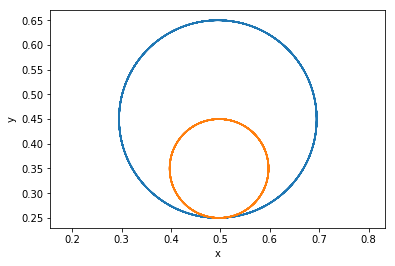

In [32]:
plt.plot(xplot[:, 0], yplot[:, 0])
plt.plot(xplot[:, 1], yplot[:, 1])


plt.xlim((0., L[0]))
plt.ylim((0., L[1]))

plt.axis('equal')

plt.xlabel('x')
plt.ylabel('y')

In [35]:
dt = 0.05
Nt = 200

xplot = np.empty((Nt + 1, 2))
yplot = np.empty((Nt + 1, 2))

xplot[0, 0] = particles[0, 0]*L[0]
yplot[0, 0] = particles[0, 1]*L[1]

xplot[0, 1] = particles[1, 0]*L[0]
yplot[0, 1] = particles[1, 1]*L[1]

energy = np.empty(Nt + 1) 

energy[0] = 1/2*(particles[0, 3]**2 + particles[0, 4]**2 + particles[0, 5]**2)

tn = np.linspace(0., Nt*dt, Nt + 1)

for i in range(Nt):
    
    pic.pusher_step3(particles, p, spans0, Nbase0, b1, b2, b3, u1, u2, u3, pp0_1, pp0_2, pp0_3, pp1_1, pp1_2, pp1_3, L, dt, Beq, 2*Ueq)
    pic.pusher_step4(particles, L, dt)
    pic.pusher_step5(particles, p, spans0, Nbase0, b1, b2, b3, pp0_1, pp0_2, pp0_3, pp1_1, pp1_2, pp1_3, L, dt, Beq)
    
    xplot[i + 1, 0] = particles[0, 0]*L[0]
    yplot[i + 1, 0] = particles[0, 1]*L[1]
    
    xplot[i + 1, 1] = particles[1, 0]*L[0]
    yplot[i + 1, 1] = particles[1, 1]*L[1]
    
    energy[i + 1] = 1/2*(particles[0, 3]**2 + particles[0, 4]**2 + particles[0, 5]**2)

Text(0,0.5,'y')

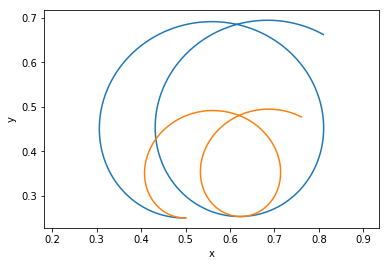

In [36]:
plt.plot(xplot[:, 0], yplot[:, 0])
plt.plot(xplot[:, 1], yplot[:, 1])


plt.xlim((0., L[0]))
plt.ylim((0., L[1]))

plt.axis('equal')

plt.xlabel('x')
plt.ylabel('y')

# 2. Test of particle accumulation (steps 1 and 3)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import bsplines          as bsp
import Bspline           as bspline

import ECHO_accumulation
import time

In [2]:
#====================================================================================
#  calling epyccel
#====================================================================================
from pyccel.epyccel import epyccel
pic = epyccel(ECHO_accumulation)

print('pyccelization of done!')
#====================================================================================

pyccelization of done!


In [52]:
Nel = [3, 3, 6]            # mesh generation on logical domain
bc  = [True, True, True]   # boundary conditions
p   = [2, 2, 3]            # splines degrees

L   = [2., 3., 1.]         # box lengthes of physical domain
Np  = int(10)              # number of particles

el_b     = [np.linspace(0., 1., Nel + 1) for Nel in Nel]                           # element boundaries
T        = [bsp.make_knots(el_b, p, bc) for el_b, p, bc in zip(el_b, p, bc)]       # knot vectors
t        = [T[1:-1] for T in T]                                                    # reduced knot vectors
Nbase0   = [Nel + p - bc*p for Nel, p, bc in zip(Nel, p, bc)]                      # number of basis functions in V0



particles       = np.empty((Np, 7), dtype=float, order='F')

particles[:, :] = np.random.rand(Np, 7)

spans0       = np.empty((Np, 3), dtype=int, order='F')
spans0[:, 0] = np.floor(particles[:, 0]*Nel[0]).astype(int) + p[0]
spans0[:, 1] = np.floor(particles[:, 1]*Nel[1]).astype(int) + p[1]
spans0[:, 2] = np.floor(particles[:, 2]*Nel[2]).astype(int) + p[2]

b1 = np.zeros((Nel[0], Nel[1], Nel[2]), order='F')
b2 = np.zeros((Nel[0], Nel[1], Nel[2]), order='F')
b3 = np.zeros((Nel[0], Nel[1], Nel[2]), order='F')

u1 = np.zeros((Nel[0], Nel[1], Nel[2]), order='F')
u2 = np.zeros((Nel[0], Nel[1], Nel[2]), order='F')
u3 = np.zeros((Nel[0], Nel[1], Nel[2]), order='F')

b1[:, :, :] = np.random.rand(Nel[0], Nel[1], Nel[2]) - 0.5
b2[:, :, :] = np.random.rand(Nel[0], Nel[1], Nel[2]) - 0.5
b3[:, :, :] = np.random.rand(Nel[0], Nel[1], Nel[2]) - 0.5

u1[:, :, :] = np.random.rand(Nel[0], Nel[1], Nel[2]) - 0.5
u2[:, :, :] = np.random.rand(Nel[0], Nel[1], Nel[2]) - 0.5
u3[:, :, :] = np.random.rand(Nel[0], Nel[1], Nel[2]) - 0.5

DF     = np.array([[  L[0], 0., 0.], [0.,   L[1], 0.], [0., 0.,   L[2]]])
DFinv  = np.array([[1/L[0], 0., 0.], [0., 1/L[1], 0.], [0., 0., 1/L[2]]])

G      = np.array([[  L[0]**2, 0., 0.], [0.,   L[1]**2, 0.], [0., 0.,   L[2]**2]])
Ginv   = np.array([[1/L[0]**2, 0., 0.], [0., 1/L[1]**2, 0.], [0., 0., 1/L[2]**2]])

g_sqrt = L[0]*L[1]*L[2]

Beq    = g_sqrt*DFinv.dot(np.array([0., 0., 1.]))
Ueq    = DF.T.dot(np.array([0.02, 0., 0.]))


# test spline spaces
spline_space0_1 = bspline.Bspline(T[0], p[0])
spline_space0_2 = bspline.Bspline(T[1], p[1])
spline_space0_3 = bspline.Bspline(T[2], p[2])

spline_space1_1 = bspline.Bspline(t[0], p[0] - 1)
spline_space1_2 = bspline.Bspline(t[1], p[1] - 1)
spline_space1_3 = bspline.Bspline(t[2], p[2] - 1)


d1 = 1/Nel[0]
d2 = 1/Nel[1]
d3 = 1/Nel[2]

In [39]:
# test for matrices in step 1
B          = np.zeros(3, dtype=float)

dt         = 0.15
B_prod     = np.zeros((3, 3), dtype=float)


mat12_test = np.zeros((Nbase0[0], Nbase0[1], Nbase0[2], Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float)
mat13_test = np.zeros((Nbase0[0], Nbase0[1], Nbase0[2], Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float)
mat23_test = np.zeros((Nbase0[0], Nbase0[1], Nbase0[2], Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float)

for ip in range(Np):
    
    print('particle ' + str(ip) + ' done')
    
    B[0] = Beq[0]
    B[1] = Beq[1]
    B[2] = Beq[2]
    
    # evaluation of B1 - component (NDD)
    for i1 in range(Nel[0] + p[0]):
        for i2 in range(Nel[1] + p[1] - 1):
            for i3 in range(Nel[2] + p[2] - 1):

                N1 = spline_space0_1(particles[ip, 0], i1)
                D2 = spline_space1_2(particles[ip, 1], i2)/d2
                D3 = spline_space1_3(particles[ip, 2], i3)/d3

                B[0] += b1[i1%Nel[0], i2%Nel[1], i3%Nel[2]] * N1 * D2 * D3
                
    # evaluation of B2 - component (DND)
    for i1 in range(Nel[0] + p[0] - 1):
        for i2 in range(Nel[1] + p[1]):
            for i3 in range(Nel[2] + p[2] - 1):

                D1 = spline_space1_1(particles[ip, 0], i1)/d1
                N2 = spline_space0_2(particles[ip, 1], i2)
                D3 = spline_space1_3(particles[ip, 2], i3)/d3

                B[1] += b2[i1%Nel[0], i2%Nel[1], i3%Nel[2]] * D1 * N2 * D3
                
    # evaluation of B3 - component (DDN)
    for i1 in range(Nel[0] + p[0] - 1):
        for i2 in range(Nel[1] + p[1] - 1):
            for i3 in range(Nel[2] + p[2]):

                D1 = spline_space1_1(particles[ip, 0], i1)/d1
                D2 = spline_space1_2(particles[ip, 1], i2)/d2
                N3 = spline_space0_3(particles[ip, 2], i3)

                B[2] += b3[i1%Nel[0], i2%Nel[1], i3%Nel[2]] * D1 * D2 * N3
                
                
    B_prod[0, 1] = -B[2]
    B_prod[0, 2] =  B[1]
    
    B_prod[1, 0] =  B[2]
    B_prod[1, 2] = -B[0]
    
    B_prod[2, 0] = -B[1]
    B_prod[2, 1] =  B[0]
    
    temp = Ginv.dot(B_prod.dot(Ginv))
    
    
    # add contribution to 12 component (DNN NDN)
    for i1 in range(Nel[0] + p[0] - 1):
        D1i = spline_space1_1(particles[ip, 0], i1)/d1
        for i2 in range(Nel[1] + p[1]):
            N2i = spline_space0_2(particles[ip, 1], i2)
            for i3 in range(Nel[2] + p[2]):
                N3i = spline_space0_3(particles[ip, 2], i3)
                for j1 in range(Nel[0] + p[0]):
                    N1j = spline_space0_1(particles[ip, 0], j1)
                    for j2 in range(Nel[1] + p[1] - 1):
                        D2j = spline_space1_2(particles[ip, 1], j2)/d2
                        for j3 in range(Nel[2] + p[2]):
                            N3j = spline_space0_3(particles[ip, 2], j3)

                            mat12_test[i1%Nel[0], i2%Nel[1], i3%Nel[2], j1%Nel[0], j2%Nel[1], j3%Nel[2]] += particles[ip, 6] * temp[0, 1] * D1i * N2i * N3i * N1j * D2j * N3j
    
    
    # add contribution to 13 component (DNN NND)
    for i1 in range(Nel[0] + p[0] - 1):
        D1i = spline_space1_1(particles[ip, 0], i1)/d1
        for i2 in range(Nel[1] + p[1]):
            N2i = spline_space0_2(particles[ip, 1], i2)
            for i3 in range(Nel[2] + p[2]):
                N3i = spline_space0_3(particles[ip, 2], i3)
                for j1 in range(Nel[0] + p[0]):
                    N1j = spline_space0_1(particles[ip, 0], j1)
                    for j2 in range(Nel[1] + p[1]):
                        N2j = spline_space0_2(particles[ip, 1], j2)
                        for j3 in range(Nel[2] + p[2] - 1):
                            D3j = spline_space1_3(particles[ip, 2], j3)/d3

                            mat13_test[i1%Nel[0], i2%Nel[1], i3%Nel[2], j1%Nel[0], j2%Nel[1], j3%Nel[2]] += particles[ip, 6] * temp[0, 2] * D1i * N2i * N3i * N1j * N2j * D3j
                            
                            
    # add contribution to 23 component (NDN NND)
    for i1 in range(Nel[0] + p[0]):
        N1i = spline_space0_1(particles[ip, 0], i1)
        for i2 in range(Nel[1] + p[1] - 1):
            D2i = spline_space1_2(particles[ip, 1], i2)/d2
            for i3 in range(Nel[2] + p[2]):
                N3i = spline_space0_3(particles[ip, 2], i3)
                for j1 in range(Nel[0] + p[0]):
                    N1j = spline_space0_1(particles[ip, 0], j1)
                    for j2 in range(Nel[1] + p[1]):
                        N2j = spline_space0_2(particles[ip, 1], j2)
                        for j3 in range(Nel[2] + p[2] - 1):
                            D3j = spline_space1_3(particles[ip, 2], j3)/d3

                            mat23_test[i1%Nel[0], i2%Nel[1], i3%Nel[2], j1%Nel[0], j2%Nel[1], j3%Nel[2]] += particles[ip, 6] * temp[1, 2] * N1i * D2i * N3i * N1j * N2j * D3j

particle 0 done
particle 1 done
particle 2 done
particle 3 done
particle 4 done
particle 5 done
particle 6 done
particle 7 done
particle 8 done
particle 9 done


In [40]:
mat12 = np.empty((Nbase0[0], Nbase0[1], Nbase0[2], Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float, order='F')
mat13 = np.empty((Nbase0[0], Nbase0[1], Nbase0[2], Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float, order='F')
mat23 = np.empty((Nbase0[0], Nbase0[1], Nbase0[2], Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float, order='F')

timea = time.time()
pic.matrix_step1(particles, p, spans0, Nbase0, b1, b2, b3, T[0], T[1], T[2], t[0], t[1], t[2], L, dt, Beq, mat12, mat13, mat23)
timeb = time.time()
print(timeb - timea)

0.0007863044738769531


In [41]:
np.allclose(mat12_test, mat12)

True

In [42]:
np.allclose(mat13_test, mat13)

True

In [43]:
np.allclose(mat23_test, mat23)

True

In [44]:
# test for matrices in step 3
B          = np.zeros(3, dtype=float)

dt         = 0.15
B_prod     = np.zeros((3, 3), dtype=float)


mat11_test = np.zeros((Nbase0[0], Nbase0[1], Nbase0[2], Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float)
mat12_test = np.zeros((Nbase0[0], Nbase0[1], Nbase0[2], Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float)
mat13_test = np.zeros((Nbase0[0], Nbase0[1], Nbase0[2], Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float)

mat22_test = np.zeros((Nbase0[0], Nbase0[1], Nbase0[2], Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float)
mat23_test = np.zeros((Nbase0[0], Nbase0[1], Nbase0[2], Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float)
mat33_test = np.zeros((Nbase0[0], Nbase0[1], Nbase0[2], Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float)

for ip in range(Np):
    
    print('particle ' + str(ip) + ' done')
    
    B[0] = Beq[0]
    B[1] = Beq[1]
    B[2] = Beq[2]
    
    
    # evaluation of 1- component
    for i1 in range(Nel[0] + p[0]):
        N1 = spline_space0_1(particles[ip, 0], i1)
        for i2 in range(Nel[1] + p[1] - 1):
            D2 = spline_space1_2(particles[ip, 1], i2)/d2
            for i3 in range(Nel[2] + p[2] - 1):
                D3 = spline_space1_3(particles[ip, 2], i3)/d3

                B[0] += b1[i1%Nel[0], i2%Nel[1], i3%Nel[2]] * N1 * D2 * D3
                
    # evaluation of 2- component
    for i1 in range(Nel[0] + p[0] - 1):
        D1 = spline_space1_1(particles[ip, 0], i1)/d1
        for i2 in range(Nel[1] + p[1]):
            N2 = spline_space0_2(particles[ip, 1], i2)
            for i3 in range(Nel[2] + p[2] - 1):
                D3 = spline_space1_3(particles[ip, 2], i3)/d3

                B[1] += b2[i1%Nel[0], i2%Nel[1], i3%Nel[2]] * D1 * N2 * D3
                
    # evaluation of 3- component
    for i1 in range(Nel[0] + p[0] - 1):
        D1 = spline_space1_1(particles[ip, 0], i1)/d1
        for i2 in range(Nel[1] + p[1] - 1):
            D2 = spline_space1_2(particles[ip, 1], i2)/d2
            for i3 in range(Nel[2] + p[2]):
                N3 = spline_space0_3(particles[ip, 2], i3)

                B[2] += b3[i1%Nel[0], i2%Nel[1], i3%Nel[2]] * D1 * D2 * N3
                
                
    B_prod[0, 1] = -B[2]
    B_prod[0, 2] =  B[1]
    
    B_prod[1, 0] =  B[2]
    B_prod[1, 2] = -B[0]
    
    B_prod[2, 0] = -B[1]
    B_prod[2, 1] =  B[0]
    
    temp = Ginv.dot(B_prod.dot(Ginv.dot(B_prod.T.dot(Ginv))))
    
    
    
    # add contribution to 11 component (DNN DNN)
    for i1 in range(Nel[0] + p[0] - 1):
        D1i = spline_space1_1(particles[ip, 0], i1)/d1
        for i2 in range(Nel[1] + p[1]):
            N2i = spline_space0_2(particles[ip, 1], i2)
            for i3 in range(Nel[2] + p[2]):
                N3i = spline_space0_3(particles[ip, 2], i3)
                for j1 in range(Nel[0] + p[0] - 1):
                    D1j = spline_space1_1(particles[ip, 0], j1)/d1
                    for j2 in range(Nel[1] + p[1]):
                        N2j = spline_space0_2(particles[ip, 1], j2)
                        for j3 in range(Nel[2] + p[2]):
                            N3j = spline_space0_3(particles[ip, 2], j3)

                            mat11_test[i1%Nel[0], i2%Nel[1], i3%Nel[2], j1%Nel[0], j2%Nel[1], j3%Nel[2]] += particles[ip, 6] * temp[0, 0] * D1i * N2i * N3i * D1j * N2j * N3j
    
    
    # add contribution to 12 component (DNN NDN)
    for i1 in range(Nel[0] + p[0] - 1):
        D1i = spline_space1_1(particles[ip, 0], i1)/d1
        for i2 in range(Nel[1] + p[1]):
            N2i = spline_space0_2(particles[ip, 1], i2)
            for i3 in range(Nel[2] + p[2]):
                N3i = spline_space0_3(particles[ip, 2], i3)
                for j1 in range(Nel[0] + p[0]):
                    N1j = spline_space0_1(particles[ip, 0], j1)
                    for j2 in range(Nel[1] + p[1] - 1):
                        D2j = spline_space1_2(particles[ip, 1], j2)/d2
                        for j3 in range(Nel[2] + p[2]):
                            N3j = spline_space0_3(particles[ip, 2], j3)

                            mat12_test[i1%Nel[0], i2%Nel[1], i3%Nel[2], j1%Nel[0], j2%Nel[1], j3%Nel[2]] += particles[ip, 6] * temp[0, 1] * D1i * N2i * N3i * N1j * D2j * N3j
    
    
    # add contribution to 13 component (DNN NND)
    for i1 in range(Nel[0] + p[0] - 1):
        D1i = spline_space1_1(particles[ip, 0], i1)/d1
        for i2 in range(Nel[1] + p[1]):
            N2i = spline_space0_2(particles[ip, 1], i2)
            for i3 in range(Nel[2] + p[2]):
                N3i = spline_space0_3(particles[ip, 2], i3)
                for j1 in range(Nel[0] + p[0]):
                    N1j = spline_space0_1(particles[ip, 0], j1)
                    for j2 in range(Nel[1] + p[1]):
                        N2j = spline_space0_2(particles[ip, 1], j2)
                        for j3 in range(Nel[2] + p[2] - 1):
                            D3j = spline_space1_3(particles[ip, 2], j3)/d3

                            mat13_test[i1%Nel[0], i2%Nel[1], i3%Nel[2], j1%Nel[0], j2%Nel[1], j3%Nel[2]] += particles[ip, 6] * temp[0, 2] * D1i * N2i * N3i * N1j * N2j * D3j
                            
    
    # add contribution to 22 component (NDN NDN)
    for i1 in range(Nel[0] + p[0]):
        N1i = spline_space0_1(particles[ip, 0], i1)
        for i2 in range(Nel[1] + p[1] - 1):
            D2i = spline_space1_2(particles[ip, 1], i2)/d2
            for i3 in range(Nel[2] + p[2]):
                N3i = spline_space0_3(particles[ip, 2], i3)
                for j1 in range(Nel[0] + p[0]):
                    N1j = spline_space0_1(particles[ip, 0], j1)
                    for j2 in range(Nel[1] + p[1] - 1):
                        D2j = spline_space1_2(particles[ip, 1], j2)/d2
                        for j3 in range(Nel[2] + p[2]):
                            N3j = spline_space0_3(particles[ip, 2], j3)

                            mat22_test[i1%Nel[0], i2%Nel[1], i3%Nel[2], j1%Nel[0], j2%Nel[1], j3%Nel[2]] += particles[ip, 6] * temp[1, 1] * N1i * D2i * N3i * N1j * D2j * N3j
    
    
    # add contribution to 23 component (NDN NND)
    for i1 in range(Nel[0] + p[0]):
        N1i = spline_space0_1(particles[ip, 0], i1)
        for i2 in range(Nel[1] + p[1] - 1):
            D2i = spline_space1_2(particles[ip, 1], i2)/d2
            for i3 in range(Nel[2] + p[2]):
                N3i = spline_space0_3(particles[ip, 2], i3)
                for j1 in range(Nel[0] + p[0]):
                    N1j = spline_space0_1(particles[ip, 0], j1)
                    for j2 in range(Nel[1] + p[1]):
                        N2j = spline_space0_2(particles[ip, 1], j2)
                        for j3 in range(Nel[2] + p[2] - 1):
                            D3j = spline_space1_3(particles[ip, 2], j3)/d3

                            mat23_test[i1%Nel[0], i2%Nel[1], i3%Nel[2], j1%Nel[0], j2%Nel[1], j3%Nel[2]] += particles[ip, 6] * temp[1, 2] * N1i * D2i * N3i * N1j * N2j * D3j
                            
                            
    # add contribution to 33 component (NND NND)
    for i1 in range(Nel[0] + p[0]):
        N1i = spline_space0_1(particles[ip, 0], i1)
        for i2 in range(Nel[1] + p[1]):
            N2i = spline_space0_2(particles[ip, 1], i2)
            for i3 in range(Nel[2] + p[2] - 1):
                D3i = spline_space1_3(particles[ip, 2], i3)/d3
                for j1 in range(Nel[0] + p[0]):
                    N1j = spline_space0_1(particles[ip, 0], j1)
                    for j2 in range(Nel[1] + p[1]):
                        N2j = spline_space0_2(particles[ip, 1], j2)
                        for j3 in range(Nel[2] + p[2] - 1):
                            D3j = spline_space1_3(particles[ip, 2], j3)/d3

                            mat33_test[i1%Nel[0], i2%Nel[1], i3%Nel[2], j1%Nel[0], j2%Nel[1], j3%Nel[2]] += particles[ip, 6] * temp[2, 2] * N1i * N2i * D3i * N1j * N2j * D3j

particle 0 done
particle 1 done
particle 2 done
particle 3 done
particle 4 done
particle 5 done
particle 6 done
particle 7 done
particle 8 done
particle 9 done


In [45]:
mat11 = np.zeros((Nbase0[0], Nbase0[1], Nbase0[2], Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float, order='F')
mat12 = np.zeros((Nbase0[0], Nbase0[1], Nbase0[2], Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float, order='F')
mat13 = np.zeros((Nbase0[0], Nbase0[1], Nbase0[2], Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float, order='F')

mat22 = np.zeros((Nbase0[0], Nbase0[1], Nbase0[2], Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float, order='F')
mat23 = np.zeros((Nbase0[0], Nbase0[1], Nbase0[2], Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float, order='F')
mat33 = np.zeros((Nbase0[0], Nbase0[1], Nbase0[2], Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float, order='F')

timea = time.time()
pic.matrix_step3(particles, p, spans0, Nbase0, b1, b2, b3, T[0], T[1], T[2], t[0], t[1], t[2], L, dt, Beq, mat11, mat12, mat13, mat22, mat23, mat33)
timeb = time.time()
print(timeb - timea)

0.0008718967437744141


In [46]:
np.allclose(mat11_test, mat11)

True

In [47]:
np.allclose(mat12_test, mat12)

True

In [48]:
np.allclose(mat13_test, mat13)

True

In [49]:
np.allclose(mat22_test, mat22)

True

In [50]:
np.allclose(mat23_test, mat23)

True

In [51]:
np.allclose(mat33_test, mat33)

True

In [53]:
# test for vectors in step 3
B          = np.zeros(3, dtype=float)

dt         = 0.15
B_prod   = np.zeros((3, 3), dtype=float)

vec1_test = np.zeros((Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float)
vec2_test = np.zeros((Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float)
vec3_test = np.zeros((Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float)

for ip in range(Np):
    
    print('particle ' + str(ip) + ' done')
    
    B[0] = Beq[0]
    B[1] = Beq[1]
    B[2] = Beq[2]
    
    # evaluation of 1- component
    for i1 in range(Nel[0] + p[0]):
        N1 = spline_space0_1(particles[ip, 0], i1)
        for i2 in range(Nel[1] + p[1] - 1):
            D2 = spline_space1_2(particles[ip, 1], i2)/d2
            for i3 in range(Nel[2] + p[2] - 1):
                D3 = spline_space1_3(particles[ip, 2], i3)/d3

                B[0] += b1[i1%Nel[0], i2%Nel[1], i3%Nel[2]] * N1 * D2 * D3
                
    # evaluation of 2- component
    for i1 in range(Nel[0] + p[0] - 1):
        D1 = spline_space1_1(particles[ip, 0], i1)/d1
        for i2 in range(Nel[1] + p[1]):
            N2 = spline_space0_2(particles[ip, 1], i2)
            for i3 in range(Nel[2] + p[2] - 1):
                D3 = spline_space1_3(particles[ip, 2], i3)/d3

                B[1] += b2[i1%Nel[0], i2%Nel[1], i3%Nel[2]] * D1 * N2 * D3
                
    # evaluation of 3- component
    for i1 in range(Nel[0] + p[0] - 1):
        D1 = spline_space1_1(particles[ip, 0], i1)/d1
        for i2 in range(Nel[1] + p[1] - 1):
            D2 = spline_space1_2(particles[ip, 1], i2)/d2
            for i3 in range(Nel[2] + p[2]):
                N3 = spline_space0_3(particles[ip, 2], i3)

                B[2] += b3[i1%Nel[0], i2%Nel[1], i3%Nel[2]] * D1 * D2 * N3
                
                
    B_prod[0, 1] = -B[2]
    B_prod[0, 2] =  B[1]
    
    B_prod[1, 0] =  B[2]
    B_prod[1, 2] = -B[0]
    
    B_prod[2, 0] = -B[1]
    B_prod[2, 1] =  B[0]
    
    temp = Ginv.dot(B_prod.dot(DFinv.dot(particles[ip, 3:6])))
    
    
    
    # add contribution to 1 component (DNN)
    for i1 in range(Nel[0] + p[0] - 1):
        D1 = spline_space1_1(particles[ip, 0], i1)/d1
        for i2 in range(Nel[1] + p[1]):
            N2 = spline_space0_2(particles[ip, 1], i2)
            for i3 in range(Nel[2] + p[2]):
                N3 = spline_space0_3(particles[ip, 2], i3)

                vec1_test[i1%Nel[0], i2%Nel[1], i3%Nel[2]] += particles[ip, 6] * temp[0] * D1 * N2 * N3
                
    # add contribution to 2 component (NDN)
    for i1 in range(Nel[0] + p[0]):
        N1 = spline_space0_1(particles[ip, 0], i1)
        for i2 in range(Nel[1] + p[1] - 1):
            D2 = spline_space1_2(particles[ip, 1], i2)/d2
            for i3 in range(Nel[2] + p[2]):
                N3 = spline_space0_3(particles[ip, 2], i3)

                vec2_test[i1%Nel[0], i2%Nel[1], i3%Nel[2]] += particles[ip, 6] * temp[1] * N1 * D2 * N3
                
    # add contribution to 3 component (NND)
    for i1 in range(Nel[0] + p[0]):
        N1 = spline_space0_1(particles[ip, 0], i1)
        for i2 in range(Nel[1] + p[1]):
            N2 = spline_space0_2(particles[ip, 1], i2)
            for i3 in range(Nel[2] + p[2] - 1):
                D3 = spline_space1_3(particles[ip, 2], i3)/d3

                vec3_test[i1%Nel[0], i2%Nel[1], i3%Nel[2]] += particles[ip, 6] * temp[2] * N1 * N2 * D3

particle 0 done
particle 1 done
particle 2 done
particle 3 done
particle 4 done
particle 5 done
particle 6 done
particle 7 done
particle 8 done
particle 9 done


In [54]:
vec1 = np.zeros((Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float, order='F')
vec2 = np.zeros((Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float, order='F')
vec3 = np.zeros((Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float, order='F')

timea = time.time()
pic.vector_step3(particles, p, spans0, Nbase0, b1, b2, b3, T[0], T[1], T[2], t[0], t[1], t[2], L, Beq, vec1, vec2, vec3)
timeb = time.time()
print(timeb - timea)

0.000225067138671875


In [55]:
np.allclose(vec1_test, vec1)

True

In [56]:
np.allclose(vec2_test, vec2)

True

In [57]:
np.allclose(vec3_test, vec3)

True